# Expected Prediction Model
$$
\bar{f}(x^{(test)}) = \mathbb{E}_{\mathcal{D}^{(test)} \sim P}\left[\hat{f}(x^{(test)}; \mathcal{D})\right]
$$

Which can be approximated as:
$$
\bar{f}(x^{(test)}) = \frac{1}{n} \sum_{i=1}^{n} \hat{f}(x^{(test)}; \mathcal{D}_{i}^{(train)})
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from generate_data import linear_data

In [2]:
X, y = linear_data(0, 10, sigma=1.8)
X_full = np.linspace(0, 10, 1000).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (40, 1)
y_train shape: (40,)


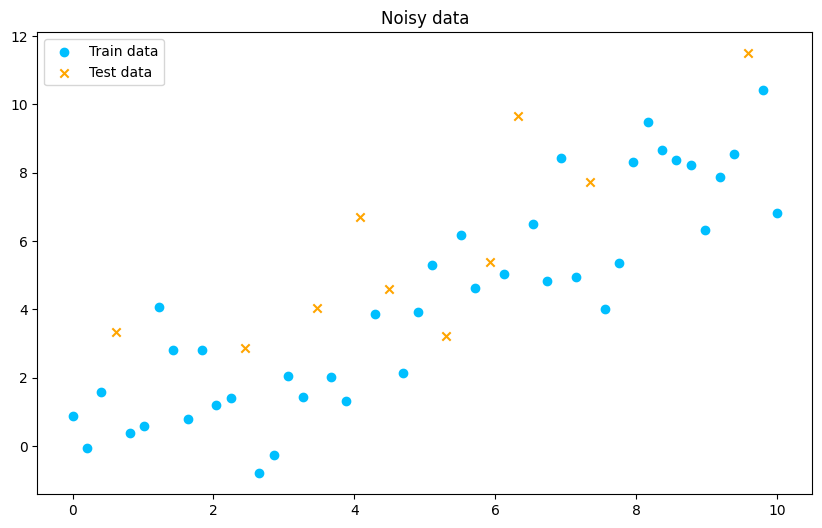

In [3]:
plt.figure(figsize=(10, 6))
plt.title('Noisy data')
plt.scatter(X_train, y_train, color='deepskyblue', label='Train data')
plt.scatter(X_test, y_test, color='orange', label='Test data', marker='x')
plt.legend()
plt.show()

#### Calculate Expected Prediction Model
$$
\bar{f}(x^{(test)}) = \mathbb{E}_{\mathcal{D}^{(test)} \sim P}\left[\hat{f}(x^{(test)}; \mathcal{D})\right]
$$

In [4]:
n_samples = 3
model = LinearRegression()

pred_all = []
for _ in range(n_samples):
    X_boot, y_boot = resample(X_train, y_train, n_samples=X_train.shape[0])
    model.fit(X_boot, y_boot)
    y_hat = model.predict(X_full)
    pred_all.append(y_hat)
pred_all = np.array(pred_all)
expected_prediction_model = np.mean(pred_all, axis=0)

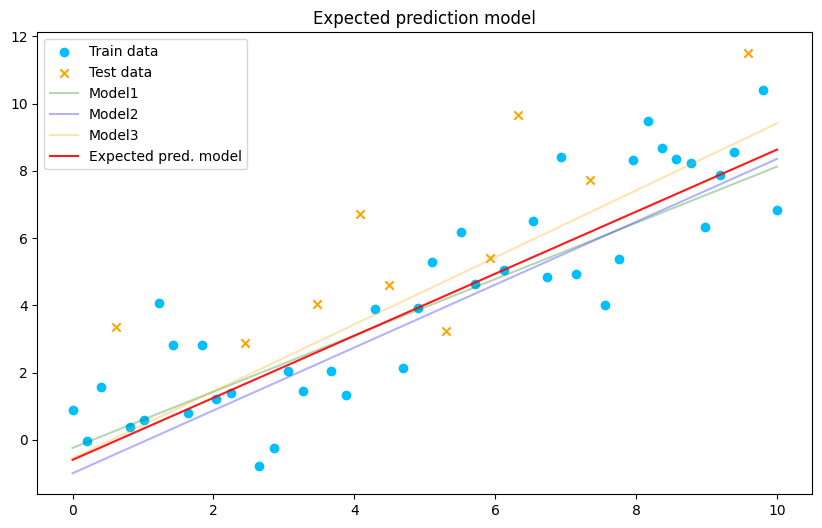

In [5]:
plt.figure(figsize=(10, 6))
plt.title('Expected prediction model')
plt.scatter(X_train, y_train, color='deepskyblue', label='Train data')
plt.scatter(X_test, y_test, color='orange', label='Test data', marker='x')

# Model 1 - 3
plt.plot(X_full, pred_all[0], color='green', alpha=0.3, label='Model1')
plt.plot(X_full, pred_all[1], color='blue', alpha=0.3, label='Model2')
plt.plot(X_full, pred_all[2], color='orange', alpha=0.3, label='Model3')

# Expected prediction model
plt.plot(X_full, expected_prediction_model, color='red', alpha=0.9, label='Expected pred. model')


plt.legend()
plt.show()